In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
#img de treino, rotulo treino / mg de teste, rotulos teste = passamos para as datas
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#mostrando matriz de imagens
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#analisando tamanho e forma da matriz de treino de imagens e rotulos
len(train_images) #60k (28,28) imagens de treino
len(train_labels)#60k rotulos
train_images.shape

(60000, 28, 28)

In [5]:
#analisando tamanho e forma da matriz de teste de imagens e rotulos
len(test_images)#60k (28,28)
len(test_labels)#60k rotulos
train_images.shape


(60000, 28, 28)

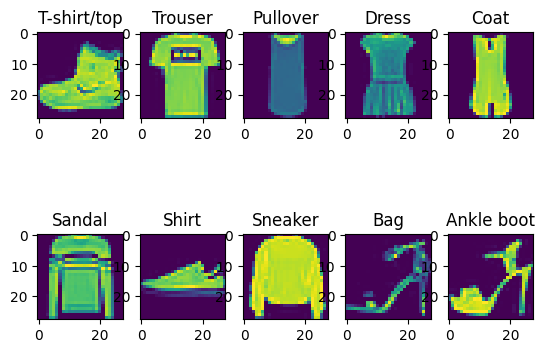

In [6]:
#mostrando imagens com rotulos utilizando o pyplot
train_labels.max()
total_class = 10
nome_classificacoes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for imagem in range(total_class):
    plt.subplot(2,5, imagem+1)
    plt.imshow(train_images[imagem])
    plt.title(nome_classificacoes[imagem]) #F004
    

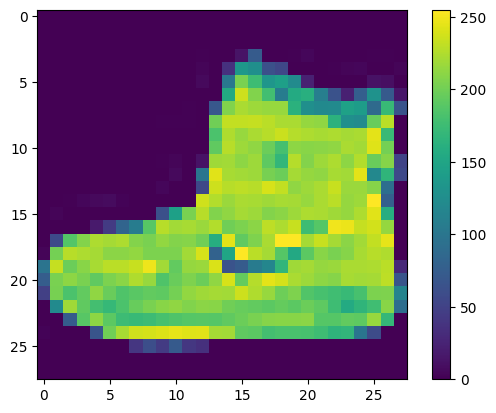

In [7]:
#analisando cores da imagem
plt.imshow(train_images[0])
plt.colorbar()


In [8]:
train_images = train_images/float(255) #processo de normalizacao para reduzir perda em relacao a cores
modelo = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),#camada 0 achatamento
                               tf.keras.layers.Dense(256, activation=tf.nn.relu)# camada 1 associando funcoes de redes neurais ao dados, Relu zera as saidas de x negativo e mantem os x positivos
                               #, tf.keras.layers.Dense(128, activation=tf.nn.relu)
                               #,tf.keras.layers.Dense(64, activation=tf.nn.relu)
                               ,tf.keras.layers.Dense(10,activation=tf.nn.softmax)#funcao de saida que soma as probabilidades/ camada 1
                               ])


c:\Users\joseb\Desktop\Estudos DEEPLEARNING\DeepLearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#compilando modelo
modelo.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
#treinando nosso modelo, 5x, separando 20% para validação
historico = modelo.fit(train_images, train_labels, epochs=10, validation_split=0.2)
#acuracia, perca, acuracia da validação, perca da validação

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0692 - val_accuracy: 0.9003 - val_loss: 0.4875
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0661 - val_accuracy: 0.8948 - val_loss: 0.5166
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0626 - val_accuracy: 0.8965 - val_loss: 0.5104
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0670 - val_accuracy: 0.8960 - val_loss: 0.5347
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9767 - loss: 0.0640 - val_accuracy: 0.8989 - val_loss: 0.5140
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0559 - val_accuracy: 0.8964 - val_loss: 0.5355
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0661 - val_accuracy: 0.9003 - val_loss: 0.5174
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0568 - 

In [78]:
#salvamos esse dicionario que mantem guardado os dados de acuracia e perca por epocas
historico.history['accuracy']#'loss', 'val_accuracy', 'val_loss'

[0.9745208621025085,
 0.9747499823570251,
 0.976312518119812,
 0.9747916460037231,
 0.9762083292007446,
 0.9770833253860474,
 0.9759166836738586,
 0.9768333435058594,
 0.9778333306312561,
 0.9785208106040955]

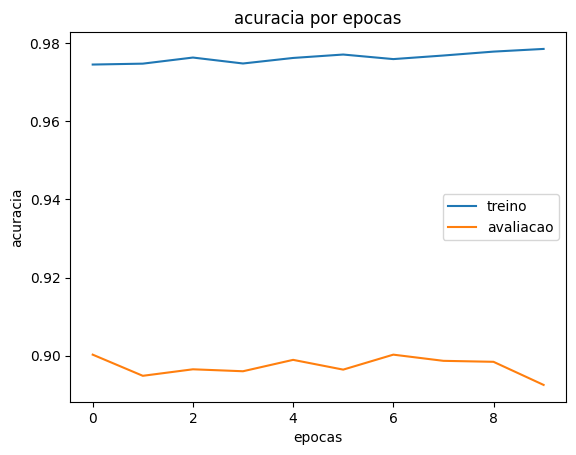

In [79]:
#iremos plotar um grafico para relacionar
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acuracia por epocas')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'avaliacao'])
#com o aumento de epocas a acuracia do treino aumentou
#com o aumento de epocas a acuracia do teste aumentou na segunda epocas mas desopencou logo apos no 3

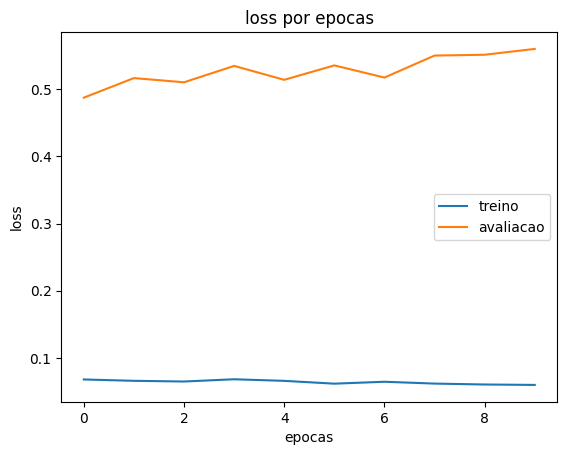

In [80]:
#plotando para as percas
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('loss por epocas')
plt.xlabel('epocas')
plt.ylabel('loss')
plt.legend(['treino', 'avaliacao'])
#ambas tem uma recao inversamente proporcional aos de acuracia

In [81]:
#testando modelo
testes = modelo.predict(test_images)
#mostrando o rotulo obtido com a imagem teste em cima do modelo criado acima
print(f'resultado: ',np.argmax(testes[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
resultado:  2


In [82]:
#mostrando o rotulo original para comparar com o obtido acima
print(f'numero da imagem de teste: ', test_labels[1])

numero da imagem de teste:  2


In [83]:
perda_teste, acuracia_teste = modelo.evaluate(test_images, test_labels)#F015

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8615 - loss: 155.7911


In [84]:
print(f'Perda de Teste: ', perda_teste)
print(f'Acuracia de Teste: ',acuracia_teste)

Perda de Teste:  164.00772094726562
Acuracia de Teste:  0.8658999800682068


In [85]:
#contando acertos
len(testes)
len(test_labels)
total_acertos = 0
total_erros = 0
for i in range(len(testes)):
    if(np.argmax(testes[i]) ==  test_labels[i]):
        total_acertos +=1
    else:
        total_erros +=1
    


In [86]:
print(f'Total de Acertos: ',total_acertos)
print(f'Total de Erros: ',total_erros)

Total de Acertos:  8659
Total de Erros:  1341
